In [210]:
import pandas as pd
import numpy as np
import random 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Simulation1

Setting up the population and dataframe for Line Graph 

In [204]:
df_for_graph = pd.DataFrame(np.nan, index=range(0, 30), columns= ("Node_Number", "Timestamp_Polarization_Reached"))

NumSim = 5

## 50 Suspectible Nodes

In [147]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 1000000 ## Max number of iterations 
N = 50 
Z = 2  
P = 2

In [148]:
df_end_opinions_50 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 53))

In [149]:
for k in range(0, NumSim):
    df_for_graph.loc[k,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    z_r1 = Zealot_right(1)
    z_l1 = Zealot_left(0)

    population.append(z_r1)
    population.append(z_l1)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    weight_list.append(4)
    weight_list.append(4)
    
    
    i = 0 

    print("Starting while", k)
    while(extremists < 0.95 and i < t_max):
        
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_50.iloc[k,] = df.iloc[i-1,]


0 - Initial Extremists: 0.15384615384615385
Starting while 0
0 - End Extremists: 0.9615384615384616
1 - Initial Extremists: 0.057692307692307696
Starting while 1
1 - End Extremists: 0.9615384615384616
2 - Initial Extremists: 0.09615384615384616
Starting while 2
2 - End Extremists: 0.9615384615384616
3 - Initial Extremists: 0.09615384615384616
Starting while 3
3 - End Extremists: 0.9615384615384616
4 - Initial Extremists: 0.11538461538461539
Starting while 4
4 - End Extremists: 0.9615384615384616


In [150]:
df_end_opinions_50

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,0.067500,0.945000,0.908750,0.175000,0.983125,0.968750,0.938125,0.112500,0.195000,0.910,...,0.012656,0.940000,0.072500,0.877500,0.032500,0.019375,0.200000,0.938750,1.0,0.0
1,0.070625,0.970781,0.018027,0.225000,0.995938,0.021240,0.006945,0.049766,0.940000,0.115,...,0.005898,0.970313,0.016289,0.021240,0.765000,0.975000,0.073750,0.985313,1.0,0.0
2,0.952637,0.056250,0.011875,0.943125,0.014063,0.995625,0.000508,0.790000,0.902500,0.145,...,0.805000,0.981875,0.989375,0.020273,0.024375,0.976641,0.080937,0.111250,1.0,0.0
3,0.991116,0.978438,0.021250,0.195000,0.001719,0.001641,0.011720,0.116250,0.952500,0.235,...,0.006133,0.973281,0.978438,0.911250,0.800000,0.005860,0.808750,0.981328,1.0,0.0
4,0.073438,0.061562,0.949062,0.938750,0.010049,0.020771,0.000244,0.760000,0.029375,0.245,...,0.906250,0.974219,0.988437,0.907188,0.935000,0.980000,0.825000,0.972500,1.0,0.0


In [151]:
df_for_graph.head()

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0


In [152]:
##df_for_graph.to_excel("Graph1Sim1_50.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_50.to_excel("EndOpinions_50.xlsx")


## 100 Suspectible Nodes

In [163]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 20000 
N = 100
Z = 4 
P = 4

In [164]:
df_end_opinions_100 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 105))

In [165]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 1 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(extremists < 0.95 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 1 * NumSim,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_100.iloc[k,] = df.iloc[i-1,]


0 - Initial Extremists: 0.057692307692307696
0 - End Extremists: 0.9519230769230769
1 - Initial Extremists: 0.11538461538461539
1 - End Extremists: 0.9519230769230769
2 - Initial Extremists: 0.07692307692307693
2 - End Extremists: 0.9519230769230769
3 - Initial Extremists: 0.11538461538461539
3 - End Extremists: 0.9519230769230769
4 - Initial Extremists: 0.11538461538461539
4 - End Extremists: 0.9519230769230769


In [166]:
df_end_opinions_100

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
0,0.966484,0.063281,0.027588,0.103750,0.076328,0.030371,0.030776,0.965000,0.994077,0.997039,...,0.028750,0.079375,0.755000,0.060742,0.026865,0.011562,1.0,0.0,1.0,0.0
1,0.029066,0.971602,0.005039,0.947500,0.991523,0.993125,0.981641,0.028281,0.992578,0.045098,...,0.987832,0.999297,0.755000,0.020000,0.994063,0.014766,1.0,0.0,1.0,0.0
2,0.022485,0.072031,0.970000,0.190000,0.945000,0.021177,0.220000,0.961250,0.029531,0.993945,...,0.988750,0.998594,0.758125,0.051035,0.994687,0.026250,1.0,0.0,1.0,0.0
3,0.969062,0.995313,0.971875,0.948125,0.056328,0.971797,0.979375,0.948750,0.994512,0.994512,...,0.986250,0.022187,0.021576,0.031328,0.986289,0.986563,1.0,0.0,1.0,0.0
4,0.026582,0.046875,0.971250,0.968750,0.971016,0.998735,0.980488,0.030000,0.983281,0.011318,...,0.023750,0.076172,0.875000,0.026250,0.995469,0.985625,1.0,0.0,1.0,0.0


In [167]:
df_for_graph

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0
5,100.0,1911.0
6,100.0,1910.0
7,100.0,1645.0
8,100.0,1732.0
9,100.0,1590.0


In [168]:
##df_for_graph.to_excel("Graph1Sim1_100.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_100.to_excel("EndOpinions_100.xlsx")

## 200 Suspectible Nodes

In [171]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 20000 
N = 200
Z = 10
P = 10

In [172]:
df_end_opinions_200 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 211))

In [173]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 2 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))


    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(extremists < 0.95 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 2 * NumSim,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_200.iloc[k,] = df.iloc[i-1,]

0 - Initial Extremists: 0.10952380952380952
0 - End Extremists: 0.9523809523809523
1 - Initial Extremists: 0.10952380952380952
1 - End Extremists: 0.9523809523809523
2 - Initial Extremists: 0.10952380952380952
2 - End Extremists: 0.9523809523809523
3 - Initial Extremists: 0.10476190476190476
3 - End Extremists: 0.9523809523809523
4 - Initial Extremists: 0.08095238095238096
4 - End Extremists: 0.9523809523809523


In [174]:
df_end_opinions_200

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
0,0.877500,0.075937,0.097500,0.117500,0.028750,0.003750,0.978750,0.034688,0.987187,0.061250,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.071250,0.988535,0.905625,0.972266,0.014375,0.907500,0.060625,0.984531,0.992812,0.016094,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.948750,0.994402,0.065000,0.958857,0.886250,0.003750,0.038750,0.027031,0.974006,0.933125,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.985000,0.994785,0.122500,0.061875,0.017188,0.920000,0.046562,0.023750,0.052187,0.973750,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.968906,0.225000,0.085000,0.984219,0.022812,0.013589,0.032969,0.026250,0.976836,0.974375,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [175]:
df_for_graph

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0
5,100.0,1911.0
6,100.0,1910.0
7,100.0,1645.0
8,100.0,1732.0
9,100.0,1590.0


In [176]:
##df_for_graph.to_excel("Graph1Sim1_200.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_200.to_excel("EndOpinions_200.xlsx")

## 300 Suspectible Nodes

In [177]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 1000000 
N = 300
Z = 14
P = 14

In [178]:
df_end_opinions_300 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 315))

In [179]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 3 * NumSim,"Node_Number"] = N
    
       ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))


    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(extremists < 0.95 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 3 * NumSim,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_300.iloc[k,] = df.iloc[i-1,]

0 - Initial Extremists: 0.08280254777070063
0 - End Extremists: 0.9522292993630573
1 - Initial Extremists: 0.08280254777070063
1 - End Extremists: 0.9522292993630573
2 - Initial Extremists: 0.08917197452229299
2 - End Extremists: 0.9522292993630573
3 - Initial Extremists: 0.07643312101910828
3 - End Extremists: 0.9522292993630573
4 - Initial Extremists: 0.0732484076433121
4 - End Extremists: 0.9522292993630573


In [180]:
df_end_opinions_300

,1,2,3,4,5,6,7,8,9,10,...,305,306,307,308,309,310,311,312,313,314
0,0.954063,0.015000,0.031035,0.097656,0.028750,0.005508,0.81000,0.958750,0.006562,0.210000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.976719,0.010000,0.936641,0.106094,0.033750,0.006719,0.03416,0.041250,0.006719,0.995156,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.950000,0.008828,0.036875,0.957500,0.795000,0.005781,0.04416,0.955000,0.964922,0.245000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.942500,0.007578,0.036738,0.107500,0.835000,0.990879,0.78500,0.974844,0.004219,0.115000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.955313,0.007500,0.920312,0.065000,0.034219,0.971250,0.76250,0.021875,0.007812,0.227500,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [181]:
df_for_graph

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0
5,100.0,1911.0
6,100.0,1910.0
7,100.0,1645.0
8,100.0,1732.0
9,100.0,1590.0


In [182]:
##df_for_graph.to_excel("Graph1Sim1_300.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_300.to_excel("EndOpinions_300.xlsx")

## 400 Suspectible Nodes

In [183]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 20000 
N = 400
Z = 20
P = 20

In [184]:
df_end_opinions_400 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 421))


In [185]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 4 * NumSim,"Node_Number"] = N
    
       ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))


    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(extremists < 0.95 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 4 * NumSim,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_400.iloc[k,] = df.iloc[i-1,]

0 - Initial Extremists: 0.0761904761904762
0 - End Extremists: 0.95
1 - Initial Extremists: 0.10714285714285714
1 - End Extremists: 0.95
2 - Initial Extremists: 0.09523809523809523
2 - End Extremists: 0.95
3 - Initial Extremists: 0.07380952380952381
3 - End Extremists: 0.95
4 - Initial Extremists: 0.09523809523809523
4 - End Extremists: 0.95


In [186]:
df_end_opinions_400

,1,2,3,4,5,6,7,8,9,10,...,411,412,413,414,415,416,417,418,419,420
0,0.991044,0.988828,0.956172,0.976270,0.014107,0.8950,0.061250,0.980293,0.037307,0.780000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.983040,0.978125,0.981191,0.171250,0.010547,0.1225,0.991289,0.955000,0.040923,0.029375,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.022617,0.205000,0.945000,0.958438,0.933750,0.9400,0.990820,0.948125,0.969844,0.765000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.011914,0.185000,0.040742,0.235000,0.918359,0.0750,0.993984,0.015352,0.112500,0.030625,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.988769,0.240000,0.979872,0.955000,0.958887,0.1025,0.041250,0.044336,0.040059,0.750000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [187]:
df_for_graph

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0
5,100.0,1911.0
6,100.0,1910.0
7,100.0,1645.0
8,100.0,1732.0
9,100.0,1590.0


In [188]:
##df_for_graph.to_excel("Graph1Sim1_400.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_400.to_excel("EndOpinions_400.xlsx")

## 500 Suspectible Nodes

In [189]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 20000 
N = 500
Z = 24
P = 24

In [190]:
df_end_opinions_500 = pd.DataFrame(np.nan, index=range(0,5), columns= range(1, 525))

In [191]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 5 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    print("Going into while", k)
    while(extremists < 0.95 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 5 * NumSim,"Timestamp_Polarization_Reached"] = i

    df_end_opinions_500.iloc[k,] = df.iloc[i-1,]

    

0 - Initial Extremists: 0.09351145038167939
Going into while 0
0 - End Extremists: 0.950381679389313
1 - Initial Extremists: 0.08778625954198473
Going into while 1
1 - End Extremists: 0.950381679389313
2 - Initial Extremists: 0.09351145038167939
Going into while 2
2 - End Extremists: 0.950381679389313
3 - Initial Extremists: 0.1049618320610687
Going into while 3
3 - End Extremists: 0.950381679389313
4 - Initial Extremists: 0.09351145038167939
Going into while 4
4 - End Extremists: 0.950381679389313


In [192]:
df_end_opinions_500

,1,2,3,4,5,6,7,8,9,10,...,515,516,517,518,519,520,521,522,523,524
0,0.004961,0.969023,0.490000,0.052500,0.152500,0.992256,0.90375,0.973750,0.940000,0.003887,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.947344,0.037749,0.310000,0.936875,0.945410,0.075498,0.12000,0.943750,0.022812,0.985000,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.984531,0.030195,0.994756,0.025703,0.930937,0.092031,0.04000,0.976250,0.030000,0.992305,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.001875,0.953672,0.989258,0.059141,0.221250,0.988418,0.07500,0.989375,0.950000,0.991250,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.947500,0.947891,0.992305,0.918750,0.918750,0.973945,0.90125,0.092500,0.030625,0.015014,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [193]:
df_for_graph

,Node_Number,Timestamp_Polarization_Reached
0,50.0,514.0
1,50.0,771.0
2,50.0,683.0
3,50.0,766.0
4,50.0,766.0
5,100.0,1911.0
6,100.0,1910.0
7,100.0,1645.0
8,100.0,1732.0
9,100.0,1590.0


In [194]:
##df_for_graph.to_excel("Graph1Sim1_500.xlsx") ## Saved as a backup in case program crashes 
##df_end_opinions_500.to_excel("EndOpinions_500.xlsx")

## Make graph

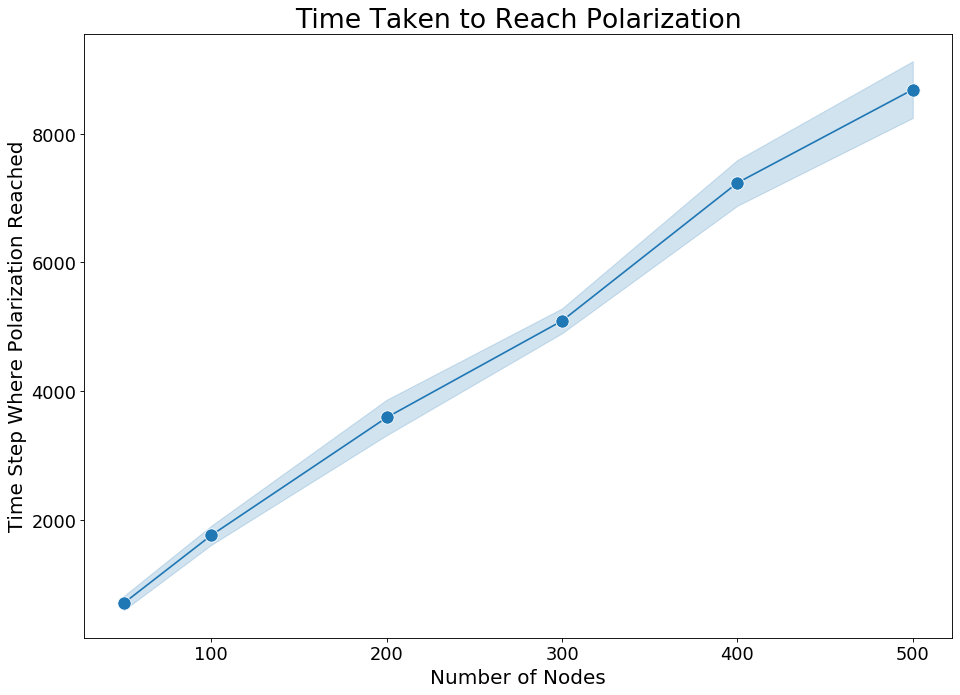

In [213]:
df_for_graph = pd.read_excel("Graph1Sim1_500.xlsx")

figure(figsize=(14, 10), dpi=80)

Graph1Sim1 = sns.lineplot(data = df_for_graph, x = "Node_Number", y = "Timestamp_Polarization_Reached",
             errorbar = "sd",
            marker='o', markersize = 12)

plt.title('Time Taken to Reach Polarization', fontsize = 24)
plt.ylabel('Time Step Where Polarization Reached', fontsize = 18)
plt.xlabel('Number of Nodes', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig('Graph1Sim1.png')
